#  World Development Indicators

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\User\Documents\world_development_indicators\Indicators.csv")

In [3]:
data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


In [4]:
data.shape

(5656458, 6)

In [39]:
data["Year"].head(20)

0     1960
1     1960
2     1960
3     1960
4     1960
5     1960
6     1960
7     1960
8     1960
9     1960
10    1960
11    1960
12    1960
13    1960
14    1960
15    1960
16    1960
17    1960
18    1960
19    1960
Name: Year, dtype: int64

This is a realy large dataset. at least in the terms of rows. But with columns, what does this hold

In [5]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


### Are there same numbers of country code?

In [6]:
# How many unique country code are there?(should be the same)
countryCodes = data["CountryCode"].unique().tolist()
len(countryCodes)

247

### Are there many indicators or few?

In [7]:
# How many unique indicators are there?
indicators = data["IndicatorName"].unique().tolist()
len(indicators)

1344

#### How many UNIQUE country names are there?

In [8]:
countries = data["CountryName"].unique().tolist()
len(countries)

247

In [9]:
countries

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

In [10]:
countryCodes = data["CountryCode"].unique().tolist()
len(countryCodes)

247

In [11]:
indicators = data["IndicatorName"].unique().tolist()
len(indicators)

1344

### How many years of data do we have?

In [12]:
year = data["Year"].unique().tolist()
len(year)

56

### What's the range of years?

In [13]:
print(min(year), "to", max(year))

1960 to 2015


### lets pick a country and an indicators to explore : CO2 Emission per capital and the USA

In [14]:
# select  CO2 emission for the united state
hist_indicator = "CO2 emissions \(metric"
hist_country = "USA"

mask1 = data["IndicatorName"].str.contains(hist_indicator)
mask2 = data["CountryCode"].str.contains(hist_country)

# stage is just those indicators matching the USA for a country code and

stage = data[mask1 & mask2]

In [15]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


###  Let's see how emission have  changed over time using Matplotlib

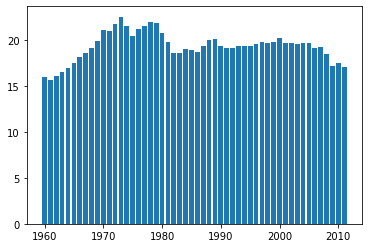

In [16]:
# get the year
years = stage["Year"].values
years
# getting the values
co2 = stage["Value"].values

# create
plt.bar(years, co2)
plt.show()


Turns out emission per capita have dropped a bit over time, but let's make this graphic a bit appealing we continue to explore it.

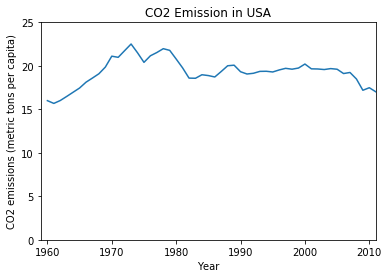

In [17]:
# switch to a line plot
plt.plot(stage["Year"].values, stage["Value"].values)

#  lable the axes
plt.xlabel("Year")
plt.ylabel(stage["IndicatorName"].iloc[0])

# lable the figure
plt.title("CO2 Emission in USA")

# to make more honest ,start the y-axis at 0
plt.axis([1959,2011,0,25])
plt.show()

### Using Histogram to explore the distribution of values

In [18]:
# lower  = stage["Value"].mean() - stage["Value"].std()
# upper = stage["Value"].mean() + stage["Value"].std()
# hist_data = [x for in stage[:10000]["Value"] if  x > lower and x < upper]

# Otherwise we can look all data like this
hist_data = stage["Value"].values

In [19]:
print(len(hist_data))

52


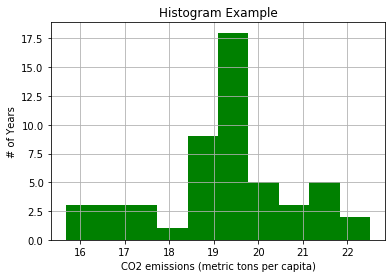

In [20]:
# the histogram of the data
plt.hist(hist_data, 10, density = False, facecolor = "green")

plt.xlabel(stage["IndicatorName"].iloc[0])
plt.ylabel("# of Years")
plt.title("Histogram Example")
    
# grid helps to find the number behind the graph   
plt.grid(True)
plt.show()

### But how do the USA's number relate to the other countries

In [71]:
# select co2 emission for all countries
hist_indicator = "CO2 emission \(metric"
hist_year = 2011


mask1 = data["IndicatorName"].str.contains(hist_indicator)
mask2 = data["Year"].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value


In [55]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [72]:
print(len(co2_2011))

0


In [24]:
mask1

0          False
1          False
2          False
3          False
4          False
           ...  
5656453    False
5656454    False
5656455    False
5656456    False
5656457    False
Name: IndicatorName, Length: 5656458, dtype: bool

In [25]:
mask2

0          False
1          False
2          False
3          False
4          False
           ...  
5656453    False
5656454    False
5656455    False
5656456    False
5656457    False
Name: Year, Length: 5656458, dtype: bool

In [26]:
co2_2011

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value


In [27]:
# let's plot histogram of the emission per capita by country

# subpot return a touple with the figure attributes
fig, ax = plt.subplots()

ax.annotate("USA",
           xy = (18,5), xycoords = "data",
           xytext =(18,30), textcoords = "data",
           arrowprops = dict(arrowstyle = "->", 
                             connectionstyle = "arc3"),
           )

plt.hist(co2_2011["Value"],10, density = False, facecolor = "green")

plt.xlabel(stage["IndicatorName"].iloc[0])
plt.ylabel("# of Countries")
plt.title("Histogram of CO2 Emission Per Capita")

# plt.axis([10,22,0,14])
plt.grid(True)

plt.show()

#   Part 2 with Matplotlib

### Relationship between GPD and CO2 Emission in USA

In [28]:
# select GPD per capito emission of the united state
hist_indicator = "GDP per capito \(constant 2005"
hist_country = "USA"

mask1 = data["IndicatorName"].str.contains(hist_indicator)
mask2 = data["CountryCode"].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and indicator name
gdp_stage = data[mask1 & mask2]


In [29]:
mask1

0          False
1          False
2          False
3          False
4          False
           ...  
5656453    False
5656454    False
5656455    False
5656456    False
5656457    False
Name: IndicatorName, Length: 5656458, dtype: bool

In [30]:
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value


In [31]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


In [32]:
# switch a line plot
# plt.plot(gdp_stage["Year"].values, gdp_stage["Value"].values)

# # label the axes
# plt.xlabel("Year")
# plt.ylabel(gdp_stage["IndicatorName"].iloc[0])

# # label the figure
# plt.title("GDP Per Capita USA")

# # to make more honest , start the y axis at 0
# # plt.axis([1959,2011,0,25])

# plt.show()
